# electron bands


[0. 0. 0. 0.] 



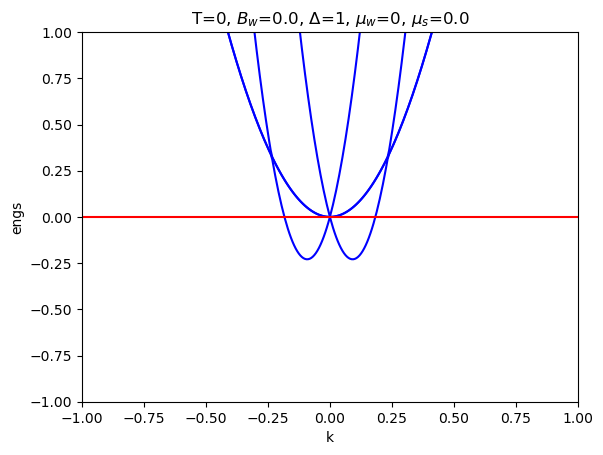

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
import time
from numpy import sqrt,pi,cos,sin,kron,min,abs
from scipy.sparse.linalg import eigsh

from full_system import*


# '''fixed parameters'''
# hbar = 1.055e-34    #J.S  
# me = 9.109e-31    #kg
# meff = 0.014*me
# a = 1e-8 #m
# L = 300
# #g·mu_B的值
# gmu = 1.4470954503  #meV/T
# meV = 1.60217e-22
# t = hbar**2/(2*meff*a**2)/meV   #量纲为meV
# alpha = 5  #约化Rashba，等于alpha/a,单位为meV 原始的单位是50meVnm
# print(t)


t_w = 27.2
alpha = 5

electron_Params = {
    "L": 300,
    "alpha": alpha,
    "Bw": 0.,
    "mu_w": 0,
    "tw": t_w,

    "Bs": 0,
    "mu_s": 0.,
    "ts": 6,
    "delta": 1,
    "T": 0,
    "BdG" : False,
    "PBC" : True
}


def main():
    '''bands'''
    sys = sys_bands(electron_Params).finalized()
    band_sys = kwant.physics.Bands(sys)
    momenta = np.linspace(-pi, pi, 1001)
    eng_sys = [band_sys(k) for k in momenta]

    # print(min(eng_sys))
    # print(min(abs(eng_sys)))


    zeros = 0. * np.ones(1001)
    plt.figure()
    plt.plot(momenta, eng_sys,'b')
    plt.plot(momenta, zeros,'r')
    plt.xlabel('k')
    plt.ylabel('engs')

    plt.title(
    f'T={electron_Params["T"]}, $B_w$={electron_Params["Bw"]}, $\\Delta$={electron_Params["delta"]}, '
    f'$\\mu_w$={electron_Params["mu_w"]}, $\\mu_s$={electron_Params["mu_s"]}')

    plt.ylim(-1,1)
    plt.xlim(-1,1)

    print(band_sys(0),'\n')


    # print(min(abs(eng_sys)))
    # # 看rashba的能带的零点和最低点
    # print(alpha/tw,'\n')
    # print(-alpha**2/(4*tw))
    # print(min(np.array(eng_sys)))

if __name__ == "__main__":
    main()


[0.42728926 0.45041805 4.30410093 9.07522753]
[0.98923858 0.01076142]
[0.99784445 0.00215555]
[0.01076142 0.98923858]
[0.00215555 0.99784445]


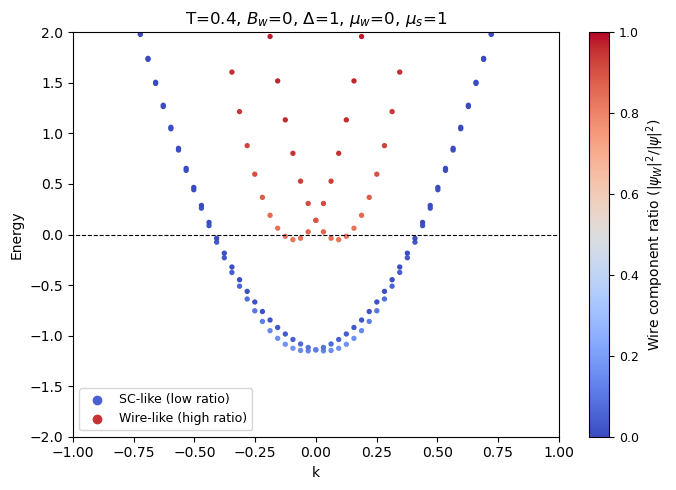

k=0 能带能量: [-1.14031242 -1.14031242  0.14031242  0.14031242]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
from numpy import sqrt, pi, abs
from scipy.sparse.linalg import eigsh
from full_system import *

electron_Params = {
    "L": 300,
    "alpha": 5,
    "Bw": 0,
    "mu_w": 0.4,
    "tw": 27.2,
    "Bs": 0,
    "mu_s": 1,
    "ts": 6,
    "delta": 1,
    "T": 0.4,
    "BdG": False,
    "PBC": True
}


def main():
    '''bands'''
    sys = sys_bands(electron_Params).finalized()
    band_sys = kwant.physics.Bands(sys)
    momenta = np.linspace(-pi, pi, 201)

    E_all = []
    W_ratio = []
    S_ratio = []


    density = kwant.operator.Density(sys)
    energies, wavefuncs = band_sys(0.5, return_eigenvectors=True)
    print(energies)
    print(density(wavefuncs[:,0]))
    print(density(wavefuncs[:,1]))
    print(density(wavefuncs[:,2]))
    print(density(wavefuncs[:,3]))

    for k in momenta:
        energies, wavefuncs = band_sys(k, return_eigenvectors=True)
        E_all.append(energies)

        # 假设晶格顺序：先 SC (y=-1)，后 W (y=0)
        n_sites = wavefuncs.shape[0] // 2
        psi_S = wavefuncs[:n_sites, :]
        psi_W = wavefuncs[n_sites:, :]

        norm2 = np.sum(np.abs(wavefuncs)**2, axis=0)
        S_comp = np.sum(np.abs(psi_S)**2, axis=0) / norm2
        W_comp = np.sum(np.abs(psi_W)**2, axis=0) / norm2

        W_ratio.append(W_comp)
        S_ratio.append(S_comp)

    E_all = np.array(E_all)
    W_ratio = np.array(W_ratio)
    S_ratio = np.array(S_ratio)

    zeros = np.zeros_like(momenta)
    plt.figure(figsize=(7, 5))
    sc = None

    for n in range(E_all.shape[1]):
        sc = plt.scatter(momenta, E_all[:, n],
                         c=W_ratio[:, n], cmap='coolwarm', s=8, vmin=0, vmax=1)

    plt.plot(momenta, zeros, 'k--', lw=0.8)
    plt.xlabel('k')
    plt.ylabel('Energy')
    plt.title(
        f'T={electron_Params["T"]}, $B_w$={electron_Params["Bw"]}, '
        f'$\\Delta$={electron_Params["delta"]}, '
        f'$\\mu_w$={electron_Params["mu_w"]}, $\\mu_s$={electron_Params["mu_s"]}'
    )

    # === 添加颜色条 ===
    cbar = plt.colorbar(sc)
    cbar.set_label('Wire component ratio ($|\\psi_W|^2 / |\\psi|^2$)', fontsize=10)
    cbar.ax.tick_params(labelsize=9)

    # === 用虚拟散点构造图例 ===
    sc_like = plt.scatter([], [], color=plt.cm.coolwarm(0.05), label='SC-like (low ratio)')
    wire_like = plt.scatter([], [], color=plt.cm.coolwarm(0.95), label='Wire-like (high ratio)')

    plt.legend(handles=[sc_like, wire_like], frameon=True, fontsize=9)

    plt.ylim(-2, 2)
    plt.xlim(-1, 1)
    plt.tight_layout()
    plt.show()

    print("k=0 能带能量:", band_sys(0))


if __name__ == "__main__":
    main()


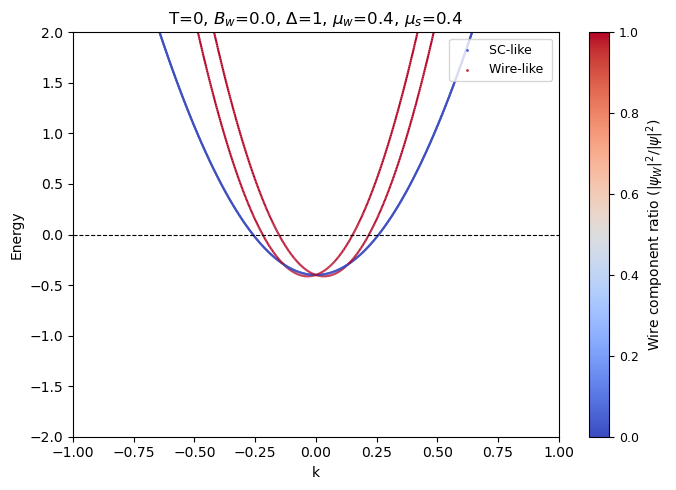

k=0 能带能量: [-0.4 -0.4 -0.4 -0.4]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
from numpy import pi
from matplotlib.collections import LineCollection
from full_system import * # 假设此模块包含 sys_bands 的定义
# %matplotlib tk
# ... [electron_Params 定义保持不变] ...
# electron_Params = {
#     "L": 300,
#     "alpha": 5,
#     "Bw": 0.0,
#     "mu_w": 1.4,
#     "tw": 27.2,
#     "Bs": 0,
#     "mu_s": 3,
#     "ts": 6,
#     "delta": 1,
#     "T": 2,
#     "BdG": False,
#     "PBC": True
# }

electron_Params = {
    "L": 300,
    "alpha": 0.8,
    "Bw": 0.0,
    "mu_w": 0.4,
    "tw": 12,
    "Bs": 0,
    "mu_s": 0.4,
    "ts": 6,
    "delta": 1,
    "T": 0,
    "BdG": False,
    "PBC": True
}



def main():
    '''bands'''
    sys = sys_bands(electron_Params).finalized()
    band_sys = kwant.physics.Bands(sys)
    momenta = np.linspace(-pi, pi, 3001)
    k_min, k_max = -1, 1 # 绘图范围

    E_all = []
    W_ratio = []

    # --- 能带计算部分 (保持不变) ---
    for k in momenta:
        energies, wavefuncs = band_sys(k, return_eigenvectors=True)
        E_all.append(energies)

        # 假设晶格顺序：先 SC (y=-1)，后 W (y=0)
        n_sites = wavefuncs.shape[0] // 2
        psi_W = wavefuncs[n_sites:, :]

        norm2 = np.sum(np.abs(wavefuncs)**2, axis=0)
        W_comp = np.sum(np.abs(psi_W)**2, axis=0) / norm2

        W_ratio.append(W_comp)

    E_all = np.array(E_all)
    W_ratio = np.array(W_ratio)
    # --- 能带计算部分结束 ---

    # --- 绘图部分：从 scatter 改为 LineCollection ---
    plt.figure(figsize=(7, 5))
    zeros = np.zeros_like(momenta)
    cmap = plt.cm.coolwarm
    
    # 定义 LineCollection 映射的颜色范围
    vmin, vmax = 0, 1

    for n in range(E_all.shape[1]): # 遍历每一条能带
        
        # 1. 构造线段的坐标点 (X, Y)
        points = np.array([momenta, E_all[:, n]]).T.reshape(-1, 1, 2)
        # points.shape: (201, 1, 2)
        
        # 2. 构造连接相邻点的线段集合
        # segments.shape: (200, 2, 2) - 200 条线段，每条线段有 2 个点，每个点有 (k, E) 2 个坐标
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # 3. 计算每条线段的颜色值（取线段起点或终点的 W_ratio，这里取起点）
        colors = W_ratio[:-1, n] 
        
        # 4. 创建 LineCollection 对象
        lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        
        # 5. 为每条线段设置颜色
        lc.set_array(colors) 
        lc.set_linewidth(1.5) # 设置线宽
        
        # 6. 添加到图上
        line = plt.gca().add_collection(lc)

    # 绘制费米能级
    plt.plot(momenta, zeros, 'k--', lw=0.8)

    # --- 设置图的属性 ---
    plt.xlabel('k')
    plt.ylabel('Energy')
    plt.title(
        f'T={electron_Params["T"]}, $B_w$={electron_Params["Bw"]}, '
        f'$\\Delta$={electron_Params["delta"]}, '
        f'$\\mu_w$={electron_Params["mu_w"]}, $\\mu_s$={electron_Params["mu_s"]}'
    )

    # === 添加颜色条 (使用 LineCollection 对象) ===
    # 注意：这里需要使用 LineCollection 对象来创建颜色条
    # 由于 LineCollection 仅用于添加线条，我们使用最后一条线 (lc) 来生成颜色条
    cbar = plt.colorbar(line) # 使用最后添加的 lc 对象 (line)
    cbar.set_label('Wire component ratio ($|\\psi_W|^2 / |\\psi|^2$)', fontsize=10)
    cbar.ax.tick_params(labelsize=9)

    # === 用虚拟散点构造图例 (保持不变) ===
    sc_like = plt.scatter([], [], color=cmap(0.05), label='SC-like ', marker='o', s=1) 
    wire_like = plt.scatter([], [], color=cmap(0.95), label='Wire-like ', marker='o', s=1)
    plt.legend(handles=[sc_like, wire_like], frameon=True, fontsize=9)
    
    # 设置显示范围
    plt.ylim(-2, 2)
    plt.xlim(k_min, k_max)
    plt.tight_layout()
    plt.show()
    # --- 绘图部分结束 ---

    print("k=0 能带能量:", band_sys(0))


if __name__ == "__main__":
    main()

# bdg 本征值和能带

(2408, 2408)
[-0.31151179  0.31151179 -0.31151179  0.31151179 -0.33525167 -0.33525167
  0.33525167  0.33525167 -0.36773565 -0.36773565  0.36773565  0.36773565
  0.37914399 -0.37914399 -0.37914399  0.37914399  0.40484951 -0.40484951
 -0.40484951 -0.42292329  0.40484951 -0.42292329 -0.44898001  0.42292329
  0.42292329 -0.44898001  0.44898001  0.44898001 -0.49259481 -0.49259481
 -0.4986646  -0.4986646   0.49259481  0.49259481  0.4986646   0.4986646
 -0.54946819 -0.54946819  0.54946819  0.54946819]
PBC gap:  0.30287597991202686
OBC gap:  0.31151179383071825


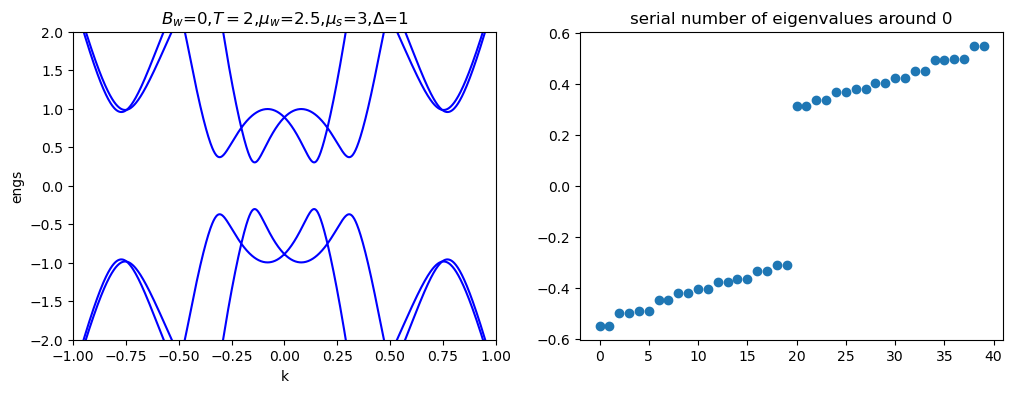

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
import time
from numpy import sqrt,pi,cos,sin,kron,min,abs
from scipy.sparse.linalg import eigsh
from full_system import*


def main():
    PBC_Params = {
    "L": 300,
    "alpha": 5,
    "Bw": 0,
    "mu_w": 2.5,
    "tw": 27.2,
    "Bs": 0,
    "mu_s": 3,
    "ts": 6,
    "delta": 1,
    "T": 2,
    "BdG": True,
    "PBC": True
    }

    
    OBC_Params = PBC_Params.copy()
    OBC_Params["PBC"] = False

    '''bands'''
    sys = sys_bands(PBC_Params).finalized()
    band_sys = kwant.physics.Bands(sys)
    momenta = np.linspace(-pi, pi, 3001)
    eng_sys = [band_sys(k) for k in momenta]

    '''eigenvalue,states'''
    sys = sys_bands(OBC_Params).finalized()
    # kwant.plot(sys)
    ham = sys.hamiltonian_submatrix(sparse = True)
    print(ham.shape)
    energies,states = eigsh(ham, k = 40, sigma = 1e-10, return_eigenvectors = True)
    print(energies)


    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(momenta, eng_sys,'b')
    plt.xlabel('k')
    plt.ylabel('engs')
    plt.title(f'$B_w$={PBC_Params["Bw"]},$T={PBC_Params["T"]}$,$\\mu_w$={PBC_Params["mu_w"]},$\\mu_s$={PBC_Params["mu_s"]},$\\Delta$={PBC_Params["delta"]}')
    plt.ylim(-2,2)
    plt.xlim(-1,1)
    print("PBC gap: ", min(abs(eng_sys)))
    print("OBC gap: ", min(abs(energies)))

    plt.subplot(1,2,2)
    plt.plot(np.arange(len(energies)),np.sort(energies),'o')
    plt.title('serial number of eigenvalues around 0')
    plt.show()

if __name__ == "__main__":
    main()


=== Lowest 10 |E| OBC eigenstates composition ===
Index       Energy          |E|     Wire_ratio       SC_ratio
------------------------------------------------------------
    0    -0.133060     0.133060         0.8933         0.1067
    2    -0.133060     0.133060         0.8933         0.1067
    3     0.133060     0.133060         0.8933         0.1067
    1     0.133060     0.133060         0.8933         0.1067
    5    -0.138751     0.138751         0.8926         0.1074
    4    -0.138751     0.138751         0.8926         0.1074
    8     0.138751     0.138751         0.8926         0.1074
    9     0.138751     0.138751         0.8926         0.1074
    6    -0.140930     0.140930         0.8907         0.1093
    7    -0.140930     0.140930         0.8907         0.1093


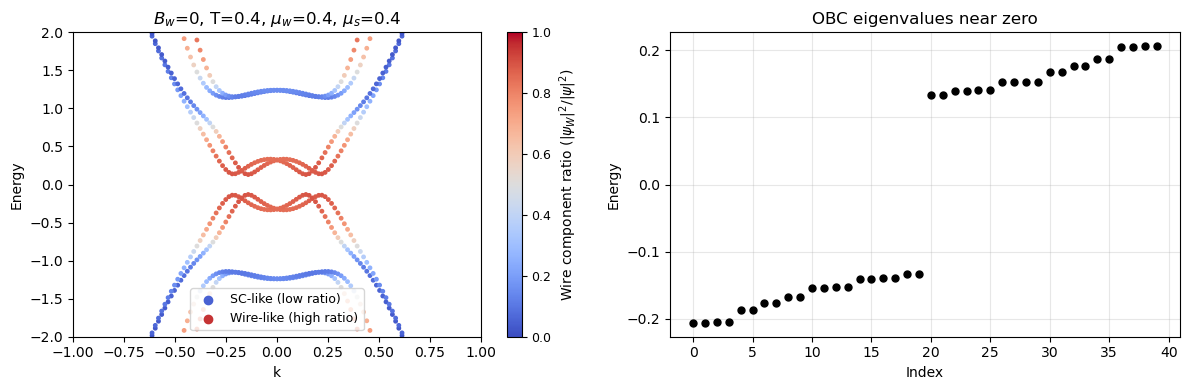

0.13109014115921025


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
from numpy import pi, abs
from scipy.sparse.linalg import eigsh
from full_system import *


def main():
    PBC_Params = {
        "L": 300,
        "alpha": 0.8,
        "Bw": 0,
        "mu_w": 0.4,
        "tw": 12,
        "Bs": 0,
        "mu_s": 0.4,
        "ts": 6,
        "delta": 1,
        "T": 0.4,
        "BdG": True,
        "PBC": True
    }

    OBC_Params = PBC_Params.copy()
    OBC_Params["PBC"] = False

    # -------- 周期性边界条件 (PBC) 能带 --------
    sys = sys_bands(PBC_Params).finalized()
    band_sys = kwant.physics.Bands(sys)
    momenta = np.linspace(-pi, pi, 401)

    E_all = []
    W_ratio = []  # 纳米线部分占比
    S_ratio = []  # 超导部分占比

    for k in momenta:
        energies, wavefuncs = band_sys(k, return_eigenvectors=True)
        E_all.append(energies)

        # 假设晶格顺序为 SC (y=-1) 在前, W (y=0) 在后
        n_sites = wavefuncs.shape[0] // 2
        psi_S = wavefuncs[:n_sites, :]
        psi_W = wavefuncs[n_sites:, :]

        # 各能带的归一化占比
        norm2 = np.sum(np.abs(wavefuncs)**2, axis=0)
        S_comp = np.sum(np.abs(psi_S)**2, axis=0) / norm2
        W_comp = np.sum(np.abs(psi_W)**2, axis=0) / norm2

        S_ratio.append(S_comp)
        W_ratio.append(W_comp)

    E_all = np.array(E_all)
    W_ratio = np.array(W_ratio)
    S_ratio = np.array(S_ratio)

    # -------- 开边界条件 (OBC) 本征谱 --------
    sys = sys_bands(OBC_Params).finalized()
    ham = sys.hamiltonian_submatrix(sparse=True)
    energies, states = eigsh(ham, k=40, sigma=1e-10, return_eigenvectors=True)

    # -------- 打印能量最低10个态的成分占比 --------
    n_sites = states.shape[0] // 2  # 假设与PBC相同顺序：前半 SC，后半 W
    idx_sorted = np.argsort(np.abs(energies))[:10]

    print("\n=== Lowest 10 |E| OBC eigenstates composition ===")
    print(f"{'Index':>5} {'Energy':>12} {'|E|':>12} {'Wire_ratio':>14} {'SC_ratio':>14}")
    print("-" * 60)

    for i in idx_sorted:
        psi = states[:, i]
        norm2 = np.sum(np.abs(psi)**2)
        psi_S = psi[:n_sites]
        psi_W = psi[n_sites:]
        W_comp = np.sum(np.abs(psi_W)**2) / norm2
        S_comp = 1 - W_comp
        print(f"{i:5d} {energies[i]:12.6f} {abs(energies[i]):12.6f} {W_comp:14.4f} {S_comp:14.4f}")

    # -------- 绘图 --------
    plt.figure(figsize=(12, 4))

    # (1) 左图：PBC 能带 + 成分占比
    plt.subplot(1, 2, 1)
    sc = None
    for n in range(E_all.shape[1]):
        sc = plt.scatter(momenta, E_all[:, n],
                         c=W_ratio[:, n], cmap='coolwarm', s=6, vmin=0, vmax=1)

    plt.xlabel('k')
    plt.ylabel('Energy')
    plt.title(
        f'$B_w$={PBC_Params["Bw"]}, T={PBC_Params["T"]}, '
        f'$\\mu_w$={PBC_Params["mu_w"]}, $\\mu_s$={PBC_Params["mu_s"]}'
    )
    plt.ylim(-2, 2)
    plt.xlim(-1, 1)

    # 颜色条
    cbar = plt.colorbar(sc)
    cbar.set_label('Wire component ratio ($|\\psi_W|^2 / |\\psi|^2$)', fontsize=10)
    cbar.ax.tick_params(labelsize=9)

    # 图例（用虚拟散点代表颜色端点）
    sc_like = plt.scatter([], [], color=plt.cm.coolwarm(0.05), label='SC-like (low ratio)')
    wire_like = plt.scatter([], [], color=plt.cm.coolwarm(0.95), label='Wire-like (high ratio)')
    plt.legend(handles=[sc_like, wire_like], frameon=True, fontsize=9)

    # (2) 右图：OBC 能谱
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(len(energies)), np.sort(energies), 'o', color='black', markersize=5)
    plt.title('OBC eigenvalues near zero')
    plt.xlabel('Index')
    plt.ylabel('Energy')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()
    print(np.min(np.abs(E_all)))


if __name__ == "__main__":
    main()


In [ ]:
def check_site_order():
    params = {
        "L": 300,   
        "alpha": 0.8,
        "Bw": 0,
        "mu_w": 0,
        "tw": 12,
        "Bs": 0,
        "mu_s": 0,
        "ts": 6,
        "delta": 1,
        "T": 0.4,
        "BdG": True,
        "PBC": True
    }

    sys = sys_bands(params).finalized()
    print(f"Total number of sites: {len(sys.sites)}\n")
    print("Index | Family | (x, y)")
    print("-" * 35)
    for i, site in enumerate(sys.sites):
        print(f"{i:3d} | {site.family.name:>4s} | {tuple(site.pos)}")

    print("\nDistinct families in system:")
    print(set(site.family.name for site in sys.sites))

if __name__ == "__main__":
    check_site_order()

Total number of sites: 4

Index | Family | (x, y)
-----------------------------------
  0 |   SC | (0.0, -1.0)
  1 |    W | (0.0, 0.0)
  2 |   SC | (-1.0, -1.0)
  3 |    W | (-1.0, 0.0)

Distinct families in system:
{'W', 'SC'}


# bands 手动调节图

In [4]:
%matplotlib tk
from full_system import *
import numpy as np
import kwant
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


# 初始值
mu_w_init = 0.0
Bw_init = 0.0

PBC_Params = {
    "L": 300,
    "alpha": 0.8,
    "Bw": 0,
    "mu_w": 0.4,
    "tw": 12,
    "Bs": 0,
    "mu_s": 0.4,
    "ts": 6,
    "delta": 1,
    "T": 0.4,
    "BdG": True,
    "PBC": True
}


def plot_bands(mu_w, Bw):
    PBC_Params["mu_w"] = mu_w
    PBC_Params["Bw"] = Bw
    sys = sys_bands(PBC_Params).finalized()
    band_sys = kwant.physics.Bands(sys)
    momenta = np.linspace(-pi, pi, 2001)
    eng_sys = np.array([band_sys(k) for k in momenta])
    
    ax.clear()
    ax.plot(momenta, eng_sys, 'b')
    ax.set_xlabel('k')
    ax.set_ylabel('Energy')
    ax.set_ylim(-2, 2)
    ax.set_xlim(-1, 1)
    ax.set_title(
        f'Band Structure $(\\Delta={PBC_Params["delta"]},\\mu_s={PBC_Params["mu_s"]},\\mu_w={PBC_Params["mu_w"]},'
        f't_s={PBC_Params["ts"]},t_w={PBC_Params["tw"]},T={PBC_Params["T"]},B_w={PBC_Params["Bw"]})$'
    )
    fig.canvas.draw_idle()

# 初始化图像
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.3)  # 预留空间放两个滑块

# 绘制初始 band
plot_bands(mu_w_init, Bw_init)

# 添加 mu_w 滑块
ax_mu_w = plt.axes([0.2, 0.2, 0.65, 0.03])
mu_w_slider = Slider(ax_mu_w, '$\\mu_w$', 0.0, 0.2, valinit=mu_w_init, valstep=0.005)

# 添加 Vw 滑块
ax_Bw = plt.axes([0.2, 0.15, 0.65, 0.03])
Bw_slider = Slider(ax_Bw, '$B_w$', 0.0, 0.3, valinit=Bw_init, valstep=0.005)

def update(val):
    plot_bands(mu_w_slider.val, Bw_slider.val)

mu_w_slider.on_changed(update)
Bw_slider.on_changed(update)

plt.show()
